### Before start, please replace every folder path

In [410]:
cluster_type = '2-7'
c= read('FER_36/1by1by1/structure_clusters_no_rep/xyzs/cluster-2-27-2.xyz')
view(c)

In [1]:
import pandas as pd
import numpy as np
import copy
from math import *
import os
import random
from collections import defaultdict
import csv
from functools import reduce
from copy import deepcopy
import pickle
from timeit import default_timer as timer
from matplotlib import pyplot as plt
from ase import Atoms
from ase.io import read
from ase.io import write
from ase.visualize import view
import itertools
import time

%matplotlib inline

pd.set_option('display.max_columns', 500)

In [269]:
plt.rcParams.update({'font.size': 25})
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["xtick.labelsize"] = 25
plt.rcParams["ytick.labelsize"] = 25
plt.rcParams["axes.labelsize"] = 30
plt.rcParams['legend.fontsize'] = 22
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['axes.titlepad'] = 25
plt.rcParams['axes.labelpad'] = 25

In [53]:
%run classes.py
%run utilities.py

In [3]:
folder_path = 'CHA_36/3by3by3'

In [8]:
#need to change path before running the following command
!mkdir FER_36/3by3by3/lattice_clusters
!mkdir FER_36/3by3by3/lattice_clusters/xyzs
!mkdir FER_36/3by3by3/lattice_clusters/images

In [9]:
#need to change path before running the following command
!mkdir FER_36/3by3by3/structure_clusters_rep
!mkdir FER_36/3by3by3/structure_clusters_rep/xyzs
!mkdir FER_36/3by3by3/structure_clusters_rep/images

In [10]:
#need to change path before running the following command
!mkdir FER_36/3by3by3/structure_clusters_no_rep
!mkdir FER_36/3by3by3/structure_clusters_no_rep/xyzs
!mkdir FER_36/3by3by3/structure_clusters_no_rep/images

In [11]:
#need to change path before running the following command
!mkdir FER_36/3by3by3/random_config_process
!mkdir FER_36/3by3by3/random_config_process/xyzs
!mkdir FER_36/3by3by3/random_config_process/images

#### Read lat.in

In [56]:
%run classes.py
%run utilities.py

In [4]:
lattice = Lattice(folder_path)

#### Run corrdump, generate clusters.out

In [9]:
#need to change path before running the following command
!corrdump -l=CHA_36/3by3by3/lat.in -cf=CHA_36/3by3by3/clusters.out -2=8.2 -3=8.2

Unable to open structure file


#### Read clusters.out

In [10]:
lattice.read_clusters_out()

In [12]:
#visualize sites without any cluster
lattice.visualize_cluster('2-18')

In [24]:
#visualize all clusters
for cluster_type in lattice.cluster_types:
    lattice.visualize_cluster(cluster_type=cluster_type)

In [73]:
cluster_type = '2-7'
c= read(folder_path+'/lattice_clusters/xyzs/cluster-{}.xyz'.format(cluster_type))
view(c)

#### read str_dim.txt

In [16]:
structure = Structure(lattice=lattice, folder_path=folder_path)

In [17]:
structure.prepare_str_out()

In [18]:
#need to change path before running the following command
if os.path.isfile('CHA_36/3by3by3/cluster_list.csv'):
    os.remove('CHA_36/3by3by3/cluster_list.csv')
    
!corrdump -l=CHA_36/3by3by3/lat.in -s=CHA_36/3by3by3/str.out -cf=CHA_36/3by3by3/clusters.out -2=8.2 -3=8.2 >> CHA_36/3by3by3/cluster_list.csv

In [19]:
structure.read_cluster_list()

In [ ]:
#structure.visualize_one_cluster_type_all_examples('3-3')

In [ ]:
#visualize_structure_all_clusters(str_clusters, structure, folder_path, rep='y')

In [20]:
pickle.dump(lattice, open(folder_path+'/lattice.p','wb'))

In [21]:
pickle.dump(structure, open(folder_path+'/structure.p','wb'))

In [24]:
#CHA
penalty = {'2-1':20, '2-2':20, '2-3':20,'2-4':20}

In [6]:
#FER
#penalty = {'2-1':20, '2-2':20, '2-3':20, '2-4':20, '2-5':20, '2-6':20, '2-7':20, '2-8':20}

In [14]:
# penalty_2 = deepcopy(penalty)
# penalty_2['3-56'] = 20
# penalty_2['3-66'] = 20
# penalty_2['3-67'] = 20

In [25]:
pickle.dump(penalty, open(folder_path+'/penalty.p', 'wb'))
#pickle.dump(penalty_2, open(folder_path+'/penalty_2.p', 'wb'))

#### results

no rules

In [59]:
ratio = 3
atom_num = int(round(1/(1+ratio)*972))
str_vecs_random = structure.random_config_swap(atom_num=atom_num, penalty={}, num_vecs=1, num_step = 5010, burn_in_period=5000)

In [60]:
count_results = structure.count_clusters_str_config(str_vecs_random[0], counting_types=['2-7','2-11'])

defaultdict(int, {'2-11': 28, '2-7': 58})

In [63]:
#titrate_results = structure.titrate_config_multi_groups(str_vecs_random[0],titration_groups=[['2-7','2-11']],titrate_num=1000)

In [102]:
int(round(1/(1+ratio)*972))

243

In [103]:
c2NN = titrate_results['2-7']
c3NN = titrate_results['2-11']
cboth = [c2NN[i] + c3NN[i] for i in range(len(c2NN))]

In [133]:
np.mean(cboth)

53.362

In [137]:
np.std(cboth)/(1000**0.5)

0.031095916130578948

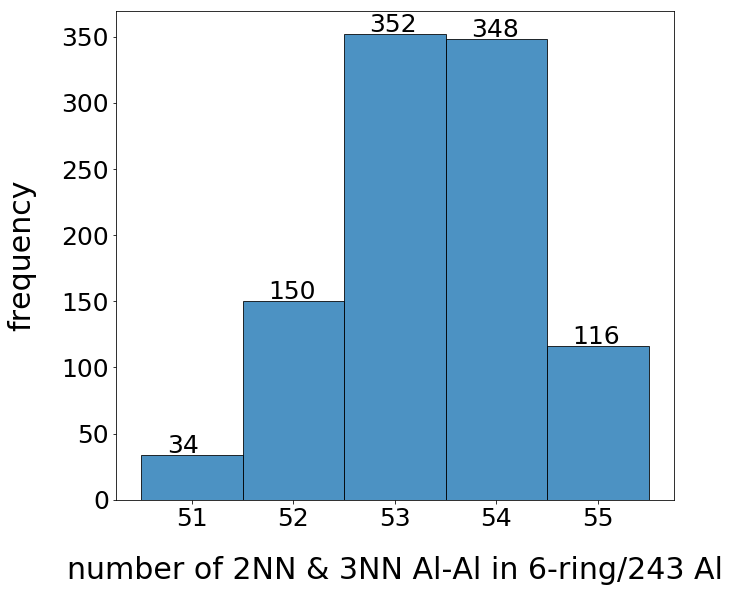

In [150]:
plt.rcParams["figure.figsize"] = (10,9)
arr=plt.hist(cboth,bins=5,range=(50.5, 55.5),alpha=0.8,histtype='bar', ec='black')
for i in range(5):
    plt.text(arr[1][i]+0.25,arr[0][i]+1.5,str(int(arr[0][i])))
plt.xlabel('number of 2NN & 3NN Al-Al in 6-ring/243 Al')
plt.ylabel('frequency');

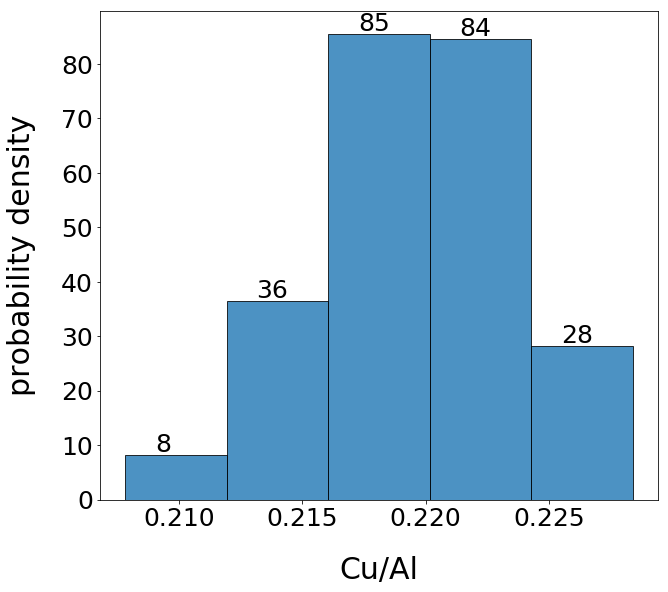

In [170]:
plt.rcParams["figure.figsize"] = (10,9)
arr = plt.hist([x/243 for x in cboth],range=(50.5/243, 55.5/243),normed=True, bins = 5, alpha=0.8,histtype='bar', ec='black')
for i in range(5):
    plt.text(arr[1][i]+0.0012,arr[0][i]+0.6,str(int(arr[0][i])))
plt.xlabel('Cu/Al')
plt.ylabel('probability density');

no1NN

In [46]:
ratio = 3
atom_num = int(round(1/(1+ratio)*972))
str_vecs = structure.random_config_swap(atom_num=atom_num, penalty=penalty, num_vecs=1, num_step = 5010, burn_in_period=5000)

['others'] [1.0]


In [125]:
structure.count_clusters_str_config(str_vecs[0], counting_types=['2-7','2-11'])

defaultdict(int, {'2-11': 23, '2-7': 85})

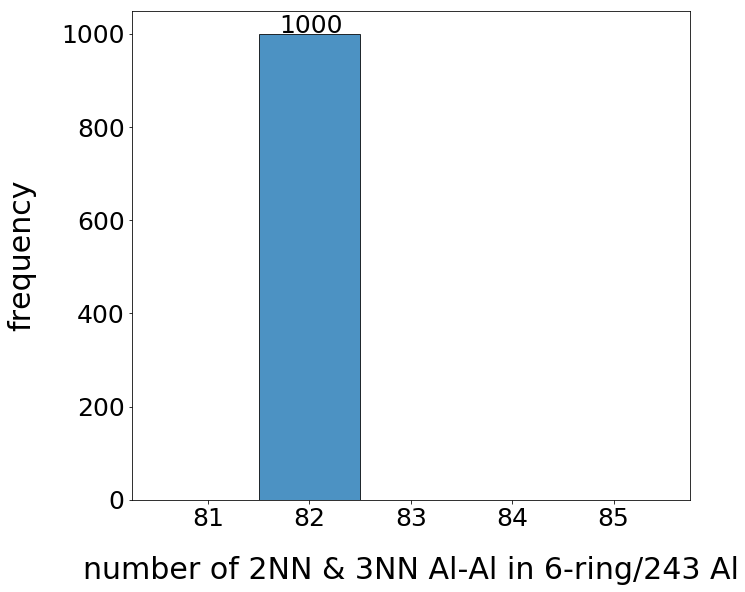

In [156]:
plt.rcParams["figure.figsize"] = (10,9)
arr=plt.hist([82 for i in range(1000)],bins=5,range=(80.5, 85.5),alpha=0.8,histtype='bar', ec='black')
plt.text(arr[1][1]+0.2,arr[0][1]+1.5,str(int(arr[0][1])))
plt.xlabel('number of 2NN & 3NN Al-Al in 6-ring/243 Al')
plt.ylabel('frequency');

In [174]:
titrate_results=structure.titrate_config_multi_groups(str_vecs[0], titration_groups=[['2-7','2-11']], titrate_num=1)

In [313]:
t = pickle.load(open('CHA_36/3by3by3/no1NN_results/swap_titration_100times_results_summary_3.p', 'rb'))
mean = []
for i in range(1000):
    mean.append(np.mean(t['total'][(100*i):100*(i+1)])/(1+int(round(1/(1+3)*972))))

In [296]:
mean = random.sample(t['total'],1000)
mean = [x/(1+int(round(1/(1+3)*972))) for x in mean]

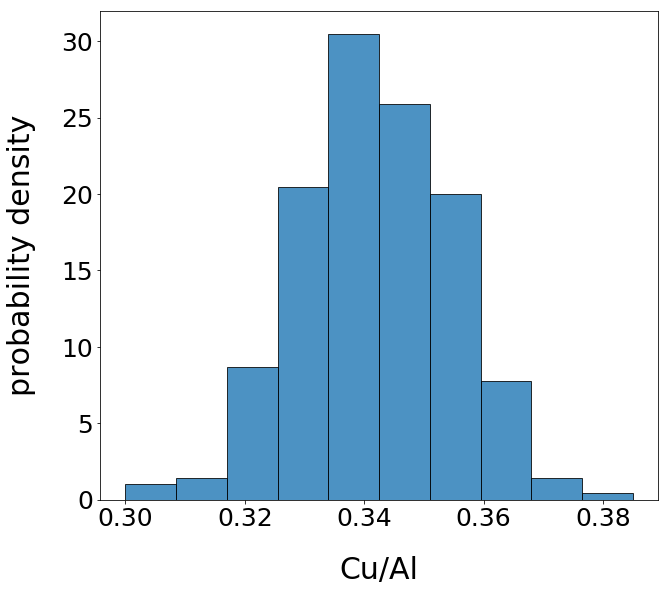

In [308]:
plt.rcParams["figure.figsize"] = (10,9)
arr=plt.hist(mean,normed=True, range=(0.30,0.385),alpha=0.8,histtype='bar', ec='black')
plt.xlabel('Cu/Al')
plt.ylabel('probability density');

In [491]:
def lengthOfLastWord(s):
    """
    :type s: str
    :rtype: int
    """
    ans = 0
    index = len(s)-1
    while index >= 0:
        print(index)
        print(s[index])
        while not s[index]:
            print(index)
            index -= 1
            if not index:
                return ans
        print(index)
        print(s[index])
        while s[index]:
            index -= 1
            ans += 1
            if index<0:
                return ans
        return ans
    return ans

In [508]:
def back_track( matrix, col, row):
    n = len(matrix)
    for i in range(n):
        if matrix[row][i] == 1:
            return False
    for i in range(n):
        if matrix[i][col] == 1:
            return False
    for i in range(1,n):
        if matrix[(row-i)%n][(col-i)%n] == 1:
            return False
    for i in range(1,n):
        if matrix[(row+i)%n][(col-i)%n] == 1:
            return False
    return True

In [514]:
a = set()
a.add(1)

In [533]:
a = '12'
b = '1'

In [539]:
for index, na in reversed(list(enumerate(a[::-1]))):
    print(index,na)

1 1
0 2


In [563]:
a = [1,2,3]

In [568]:
for i,n in enumerate(a[:-1]):
    print(n)

1
2


In [570]:
'////'.split('/')

['', '', '', '', '']

In [560]:
b

'01'

In [556]:
d = '5'

In [557]:
c = (d.join(a))
c

'152'

In [548]:
b

'01'

In [517]:
b.add(2)

In [519]:
b.union(set([3]))

{1, 2, 3}

In [496]:
import itertools
list(itertools.permutations([i] for i in range(2)))

[([0], [1]), ([1], [0])]

In [378]:
CHAdf = pd.DataFrame(columns=['Si_Al_ratio', 'config_rules', 'method', 'titrate_count_rules','c6ring_mean','c6ring_std','c3NN_8ring_mean','c3NN_8ring_std','c4NN_8ring_mean','c4NN_8ring_std'])

In [363]:
no1nn_mean = []
no1nn_std = []
for ratio in ratios:
    t = pickle.load(open('CHA_36/3by3by3/no1NN_results/swap_titration_100times_results_summary_{}.p'.format(ratio), 'rb'))
    mean = random.sample(t['total'],1000)
    mean = [x/(1+int(round(1/(1+ratio)*972))) for x in mean]
    no1nn_mean.append(np.mean(mean))
    no1nn_std.append(np.std(mean))

In [379]:
temp = pd.DataFrame(columns=CHAdf.columns)
temp.Si_Al_ratio = ratios
temp.config_rules = ['no1NN' for i in range(len(ratios))]
temp.method = ['titrate' for i in range(len(ratios))]
temp.titrate_count_rules = np.nan
temp.c6ring_mean = no1nn_mean
temp.c6ring_std = no1nn_std
temp.c3NN_8ring_mean = np.nan
temp.c3NN_8ring_std = np.nan
temp.c4NN_8ring_mean = np.nan
temp.c4NN_8ring_std = np.nan

In [380]:
CHAdf=CHAdf.append(temp)

no1NN exc3Al

In [370]:
no1nn_exc3Al_mean = []
no1nn_exc3Al_std = []
for ratio in ratios:
    t = pickle.load(open('CHA_36/3by3by3/no1NN_exclude3Al_results/CHA_36_333_no1NN_{}_swap_titration.p'.format(ratio), 'rb'))
    no1nn_exc3Al_mean.append(np.mean(t['total'])/(1+int(round(1/(1+ratio)*972))))
    no1nn_exc3Al_std.append(np.std(t['total'])/(1+int(round(1/(1+ratio)*972))))

In [381]:
temp = pd.DataFrame(columns=CHAdf.columns)
temp.Si_Al_ratio = ratios
temp.config_rules = ['no1NN' for i in range(len(ratios))]
temp.method = ['titrate' for i in range(len(ratios))]
temp.titrate_count_rules = ['exclude 3Al in 6ring' for i in range(len(ratios))]
temp.c6ring_mean = no1nn_exc3Al_mean
temp.c6ring_std = no1nn_exc3Al_std
temp.c3NN_8ring_mean = np.nan
temp.c3NN_8ring_std = np.nan
temp.c4NN_8ring_mean = np.nan
temp.c4NN_8ring_std = np.nan

In [382]:
CHAdf=CHAdf.append(temp)
CHAdf.reset_index(drop=True, inplace=True)

In [229]:
no1nn3Al_mean = []
no1nn3Al_std = []
for ratio in ratios:
    t = pickle.load(open('CHA_36/3by3by3/no1NN_no3Al_results/CHA_36_333_no1NNno3Al_{}_swap_titration.p'.format(ratio), 'rb'))
    no1nn3Al_mean.append(np.mean(t['total'])/(1+int(round(1/(1+ratio)*972))))
    no1nn3Al_std.append(np.std(t['total'])/(1+int(round(1/(1+ratio)*972))))

In [383]:
temp = pd.DataFrame(columns=CHAdf.columns)
temp.Si_Al_ratio = ratios
temp.config_rules = ['no1NN no3Al in 6ring' for i in range(len(ratios))]
temp.method = ['titrate' for i in range(len(ratios))]
temp.titrate_count_rules = np.nan
temp.c6ring_mean = no1nn3Al_mean
temp.c6ring_std = no1nn3Al_std
temp.c3NN_8ring_mean = np.nan
temp.c3NN_8ring_std = np.nan
temp.c4NN_8ring_mean = np.nan
temp.c4NN_8ring_std = np.nan

In [384]:
CHAdf=CHAdf.append(temp)
CHAdf.reset_index(drop=True, inplace=True)

In [385]:
CHAdf

,Si_Al_ratio,config_rules,method,titrate_count_rules,c6ring_mean,c6ring_std,c3NN_8ring_mean,c3NN_8ring_std,c4NN_8ring_mean,c4NN_8ring_std
0,3,no1NN,titrate,NaN,0.341844,0.011933,NaN,NaN,NaN,NaN
1,5,no1NN,titrate,NaN,0.242399,0.019466,NaN,NaN,NaN,NaN
2,7,no1NN,titrate,NaN,0.182707,0.025037,NaN,NaN,NaN,NaN
3,10,no1NN,titrate,NaN,0.134202,0.027593,NaN,NaN,NaN,NaN
4,15,no1NN,titrate,NaN,0.089274,0.029647,NaN,NaN,NaN,NaN
5,20,no1NN,titrate,NaN,0.070596,0.033173,NaN,NaN,NaN,NaN
6,25,no1NN,titrate,NaN,0.054053,0.034584,NaN,NaN,NaN,NaN
7,30,no1NN,titrate,NaN,0.047219,0.034600,NaN,NaN,NaN,NaN
8,35,no1NN,titrate,NaN,0.036857,0.034088,NaN,NaN,NaN,NaN
9,40,no1NN,titrate,NaN,0.031640,0.032627,NaN,NaN,NaN,NaN


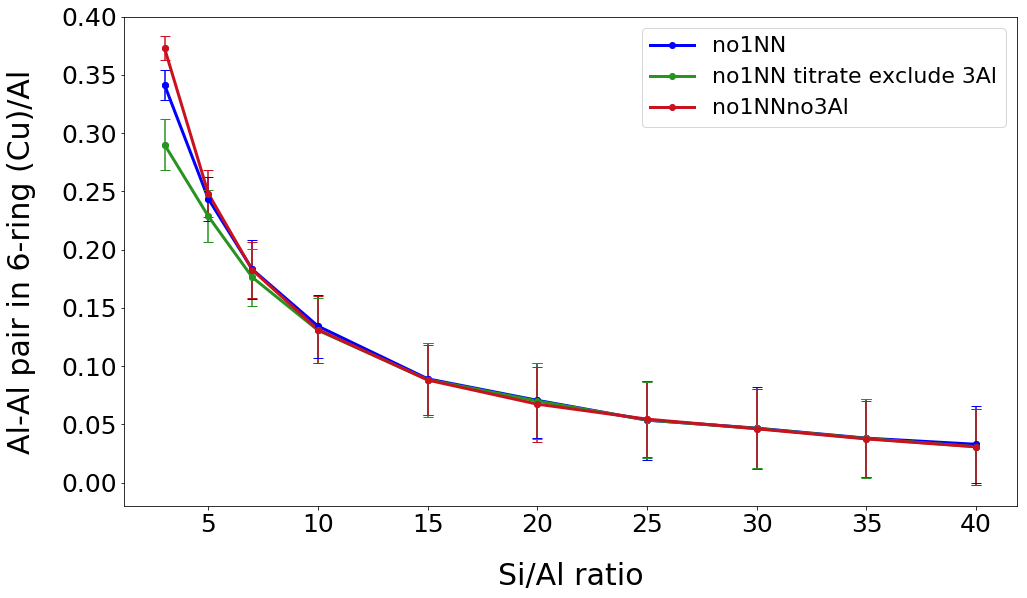

In [332]:
plt.rcParams["figure.figsize"] = (16,9)
plt.plot(ratios, no1nn_mean, label='no1NN', marker='o',linewidth=3,color='b')
plt.errorbar(ratios, no1nn_mean, yerr=no1nn_std, fmt='o', capsize=5,color='b')
plt.plot(ratios, no1nn_exc3Al_mean, label='no1NN titrate exclude 3Al', marker='o',color='#279321',linewidth=3)
plt.errorbar(ratios, no1nn_exc3Al_mean, yerr=no1nn_exc3Al_std, fmt='o', capsize=5,color='#279321')
plt.plot(ratios, no1nn3Al_mean, label='no1NNno3Al', marker='o', color='#CA111F',linewidth=3)
plt.errorbar(ratios, no1nn3Al_mean, yerr = no1nn3Al_std, fmt='o', capsize=5, color='#CA111F')
plt.ylim((-0.02,0.4))
plt.legend()
plt.xlabel('Si/Al ratio')
plt.ylabel('Al-Al pair in 6-ring (Cu)/Al');

### include 8-ring

In [345]:
titrate_43 = pickle.load(open('CHA_36/3by3by3/no1NN_results/include_8ring/swap_no1NN_titration_EX3Al_4.3_summary.p','rb'))

In [389]:
CHAdf['titration_order'] = ['c6ring' for i in range(len(CHAdf.index))]

In [390]:
CHAdf.columns

Index(['Si_Al_ratio', 'config_rules', 'method', 'titrate_count_rules',
       'c6ring_mean', 'c6ring_std', 'c3NN_8ring_mean', 'c3NN_8ring_std',
       'c4NN_8ring_mean', 'c4NN_8ring_std', 'titration_order'],
      dtype='object')

In [391]:
temp = pd.DataFrame(data=[[4.3, 'no1NN', 'titrate', 'exclude 3Al in 6ring', np.mean(titrate_43['total 6ring'])/int(round(1/(1+4.3)*972)), np.std(titrate_43['total 6ring'])/int(round(1/(1+4.3)*972)), np.mean(titrate_43['total 3NN 8ring'])/int(round(1/(1+4.3)*972)),np.std(titrate_43['total 3NN 8ring'])/int(round(1/(1+4.3)*972)),np.mean(titrate_43['total 4NN 8ring'])/int(round(1/(1+4.3)*972)),np.std(titrate_43['total 4NN 8ring'])/int(round(1/(1+4.3)*972)), 'c6ring >  c4NN_8ring > c3NN_8ring']],columns=CHAdf.columns)

In [393]:
CHAdf=CHAdf.append(temp)
CHAdf.reset_index(drop=True, inplace=True)

In [349]:
count_43 = pickle.load(open('CHA_36/3by3by3/no1NN_results/include_8ring/swap_no1NN_count_EX3Al_4.3_summary.p','rb'))

In [394]:
temp = pd.DataFrame(data=[[4.3, 'no1NN', 'count', 'exclude 3Al in 6ring', np.mean(count_43['total 6ring'])/int(round(1/(1+4.3)*972)), np.std(count_43['total 6ring'])/int(round(1/(1+4.3)*972)), np.mean(count_43['total 3NN 8ring'])/int(round(1/(1+4.3)*972)),np.std(count_43['total 3NN 8ring'])/int(round(1/(1+4.3)*972)),np.mean(count_43['total 4NN 8ring'])/int(round(1/(1+4.3)*972)),np.std(count_43['total 4NN 8ring'])/int(round(1/(1+4.3)*972)), np.nan]],columns=CHAdf.columns)

In [396]:
CHAdf=CHAdf.append(temp)
CHAdf.reset_index(drop=True, inplace=True)

In [353]:
titrate_45 = pickle.load(open('CHA_36/3by3by3/no1NN_results/include_8ring/swap_no1NN_titration_EX3Al_4.5_summary.p','rb'))

In [357]:
count_45 = pickle.load(open('CHA_36/3by3by3/no1NN_results/include_8ring/swap_no1NN_count_EX3Al_4.5_summary.p','rb'))

In [397]:
temp = pd.DataFrame(data=[[4.5, 'no1NN', 'titrate', 'exclude 3Al in 6ring', np.mean(titrate_45['total 6ring'])/int(round(1/(1+4.5)*972)), np.std(titrate_45['total 6ring'])/int(round(1/(1+4.5)*972)), np.mean(titrate_45['total 3NN 8ring'])/int(round(1/(1+4.5)*972)),np.std(titrate_45['total 3NN 8ring'])/int(round(1/(1+4.5)*972)),np.mean(titrate_45['total 4NN 8ring'])/int(round(1/(1+4.5)*972)),np.std(titrate_45['total 4NN 8ring'])/int(round(1/(1+4.5)*972)), 'c6ring >  c4NN_8ring > c3NN_8ring']],columns=CHAdf.columns)

In [399]:
CHAdf=CHAdf.append(temp)
CHAdf.reset_index(drop=True, inplace=True)

In [400]:
temp = pd.DataFrame(data=[[4.5, 'no1NN', 'count', 'exclude 3Al in 6ring', np.mean(count_45['total 6ring'])/int(round(1/(1+4.5)*972)), np.std(count_45['total 6ring'])/int(round(1/(1+4.5)*972)), np.mean(count_45['total 3NN 8ring'])/int(round(1/(1+4.5)*972)),np.std(count_45['total 3NN 8ring'])/int(round(1/(1+4.5)*972)),np.mean(count_45['total 4NN 8ring'])/int(round(1/(1+4.5)*972)),np.std(count_45['total 4NN 8ring'])/int(round(1/(1+4.5)*972)), np.nan]],columns=CHAdf.columns)

In [402]:
CHAdf=CHAdf.append(temp)
CHAdf.reset_index(drop=True, inplace=True)

In [403]:
CHAdf

,Si_Al_ratio,config_rules,method,titrate_count_rules,c6ring_mean,c6ring_std,c3NN_8ring_mean,c3NN_8ring_std,c4NN_8ring_mean,c4NN_8ring_std,titration_order
0,3,no1NN,titrate,NaN,0.341844,0.011933,NaN,NaN,NaN,NaN,c6ring
1,5,no1NN,titrate,NaN,0.242399,0.019466,NaN,NaN,NaN,NaN,c6ring
2,7,no1NN,titrate,NaN,0.182707,0.025037,NaN,NaN,NaN,NaN,c6ring
3,10,no1NN,titrate,NaN,0.134202,0.027593,NaN,NaN,NaN,NaN,c6ring
4,15,no1NN,titrate,NaN,0.089274,0.029647,NaN,NaN,NaN,NaN,c6ring
5,20,no1NN,titrate,NaN,0.070596,0.033173,NaN,NaN,NaN,NaN,c6ring
6,25,no1NN,titrate,NaN,0.054053,0.034584,NaN,NaN,NaN,NaN,c6ring
7,30,no1NN,titrate,NaN,0.047219,0.034600,NaN,NaN,NaN,NaN,c6ring
8,35,no1NN,titrate,NaN,0.036857,0.034088,NaN,NaN,NaN,NaN,c6ring
9,40,no1NN,titrate,NaN,0.031640,0.032627,NaN,NaN,NaN,NaN,c6ring


### penalty & time vs number of swaps

In [98]:
def read_txt_file_to_float(filepath):
    file = open(filepath, 'r')
    lines = file.readlines()
    return [float(x) for x in lines]

In [99]:
penalty_factors = [1, 5, 10, 20]

In [100]:
ps = {}
ts = {}
for pf in penalty_factors:
    ps[pf] = read_txt_file_to_float('CHA_36/3by3by3/no1NN_results_exclude3Al/swap/ps_{}.txt'.format(pf))
    ts[pf] = read_txt_file_to_float('CHA_36/3by3by3/no1NN_results_exclude3Al/swap/time_{}.txt'.format(pf))

In [101]:
taverage = [(ts[1][i]+ts[5][i]+ts[10][i]+ts[20][i])/4 for i in range(10000)]

In [102]:
number_of_swaps = np.arange(1, 1+len(ps[1]))

In [110]:
select_results = read_txt_file_to_float('CHA_36/3by3by3/no1NN_results_exclude3Al/select/select_titration_result_243.txt')
swap_results = read_txt_file_to_float('CHA_36/3by3by3/no1NN_results_exclude3Al/swap/swap_titration_result_243.txt')

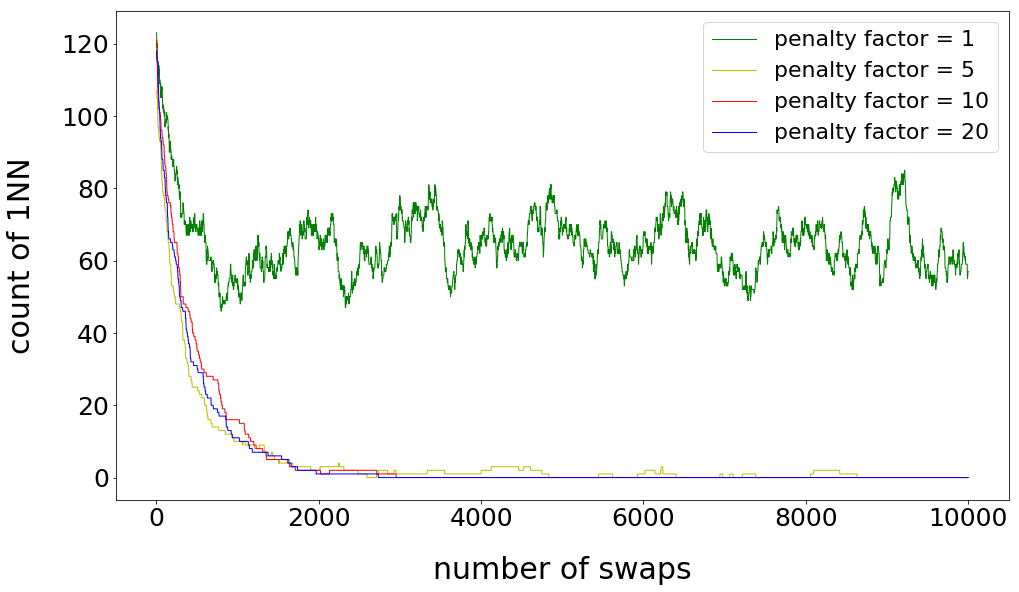

In [112]:
fig, ax = plt.subplots()
ax.plot(number_of_swaps[:10000], ps[1][:10000], label='penalty factor = 1',linewidth=1,c='g')
ax.plot(number_of_swaps[:10000], ps[5][:10000], label='penalty factor = 5',linewidth=1,c='y')
ax.plot(number_of_swaps[:10000], ps[10][:10000], label='penalty factor = 10',linewidth=1, c='r')
ax.plot(number_of_swaps[:10000], ps[20][:10000], label='penalty factor = 20',linewidth=1, c='b')
ax.set_xlabel('number of swaps')
ax.set_ylabel('count of 1NN')
plt.legend();

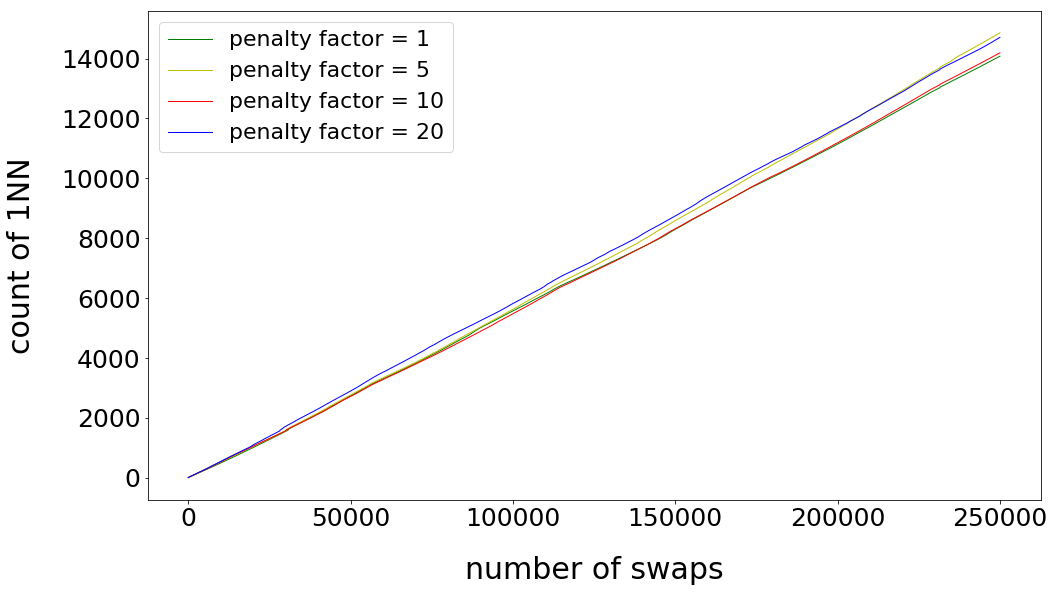

In [113]:
fig, ax = plt.subplots()
ax.plot(number_of_swaps[:250000], ts[1][:250000], label='penalty factor = 1',linewidth=1,c='g')
ax.plot(number_of_swaps[:250000], ts[5][:250000], label='penalty factor = 5',linewidth=1,c='y')
ax.plot(number_of_swaps[:250000], ts[10][:250000], label='penalty factor = 10',linewidth=1, c='r')
ax.plot(number_of_swaps[:250000], ts[20][:250000], label='penalty factor = 20',linewidth=1, c='b')
ax.set_xlabel('number of swaps')
ax.set_ylabel('count of 1NN')
plt.legend();

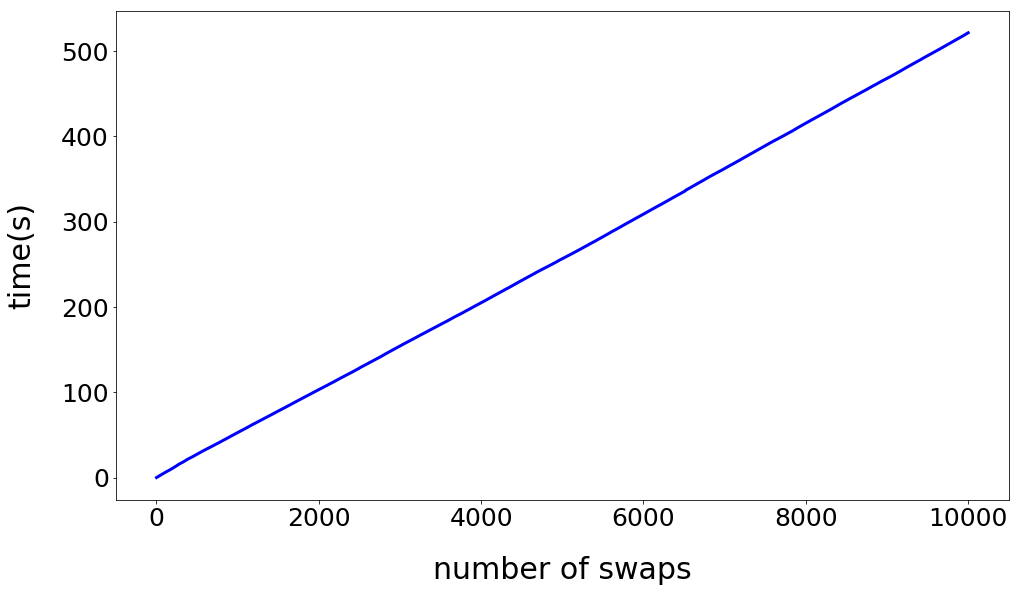

In [114]:
fig, ax = plt.subplots()
ax.plot(number_of_swaps[:10000], taverage, linewidth=3, c='b')
ax.set_xlabel('number of swaps')
ax.set_ylabel('time(s)');

### Results comparison among different algorithms

In [115]:
Chris_data_2016 = [0.290530303030303, 0.2261363636363637, 0.13143939393939397, 0.09166666666666673, 0.0679924242424243, 0.05473484848484855, 0.046212121212121315, 0.03768939393939397, 0.03390151515151518, 0.030113636363636398]

In [116]:
Chris_data_2014 =[0.269, 0.229, 0.18, 0.141, 0.089,0.0596,0.0524,0.0482,0.0398, 0.0344]

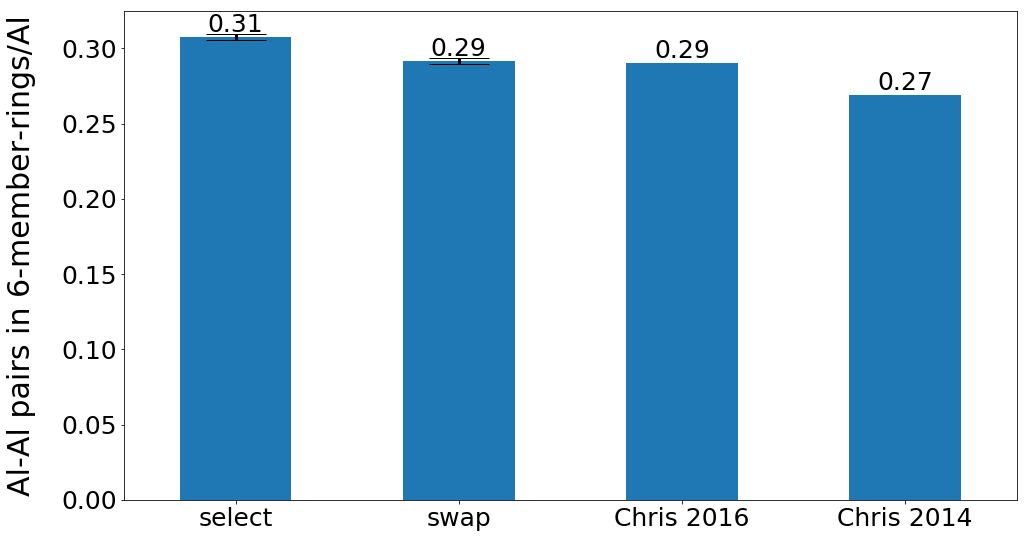

In [117]:
x_labels = ['select', 'swap', 'Chris 2016', 'Chris 2014']
values = [np.mean(select_results)/243, np.mean(swap_results)/243, 0.29053, 0.269]
value_series = pd.Series.from_array(values)
x_labels = x_labels
ind = np.arange(4)  # the x locations for the groups
width = 0.35       # the width of the bars
yerr = [np.std(select_results)/243/1000**(1/3),np.std(swap_results)/243/1000**(1/3),np.nan,np.nan]
# now to plot the figure...

plt.figure()
ax = value_series.plot(kind='bar', yerr=yerr)

plt.errorbar(ind , value_series, yerr=yerr,capsize=30, elinewidth=3, c='k', ls='none')

ax.set_ylabel('Al-Al pairs in 6-member-rings/Al')
ax.set_xticklabels(x_labels)

plt.setp(ax.xaxis.get_majorticklabels(), rotation=0 )

rects = ax.patches

# Now make some labels
labels = ['{:.2f}'.format(x) for x in values]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom')


In [122]:
print(np.mean(select_total_pairs[3]), np.std(select_total_pairs[3]))

0.3085185185185185 0.020210370515166488


In [123]:
print(np.mean(swap_total_pairs[3]), np.std(swap_total_pairs[3]))

0.2904732510288066 0.021061266452221186


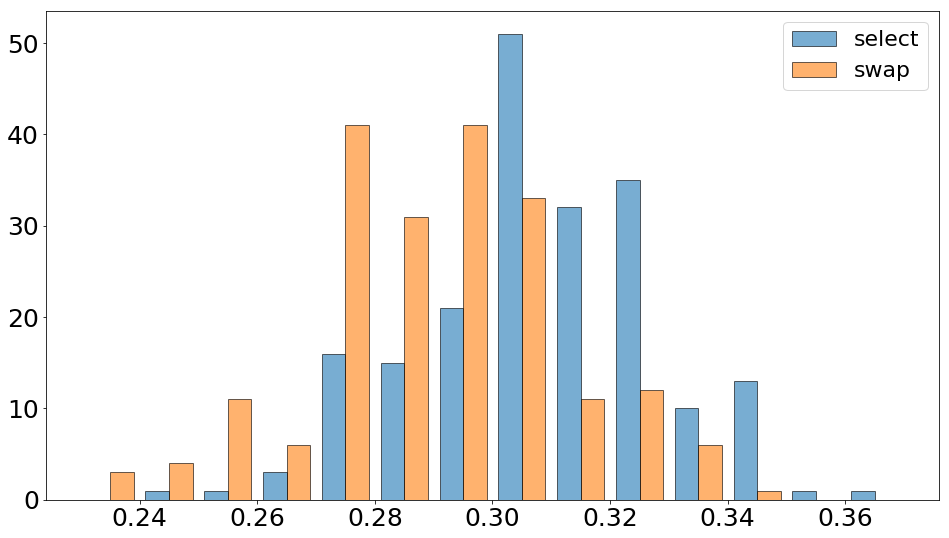

In [124]:
x = select_total_pairs[3]
y = swap_total_pairs[3]

data = np.vstack([x, y]).T
bins = np.linspace(0.23, 0.37, 15)

plt.hist(data, bins, alpha=0.6, label=['select', 'swap'],histtype='bar', ec='black')
plt.legend(loc='upper right')
plt.show()

In [125]:
Chris_data_2016 = [0.290530303030303, 0.2261363636363637, 0.1754716981132075, 0.13143939393939397, 0.09166666666666673, 0.0679924242424243, 0.05473484848484855, 0.046212121212121315, 0.03768939393939397, 0.03390151515151518]

In [126]:
Chris_data_2014 =[0.269, 0.229, 0.18, 0.141, 0.089,0.0596,0.0524,0.0482,0.0398, 0.0344]

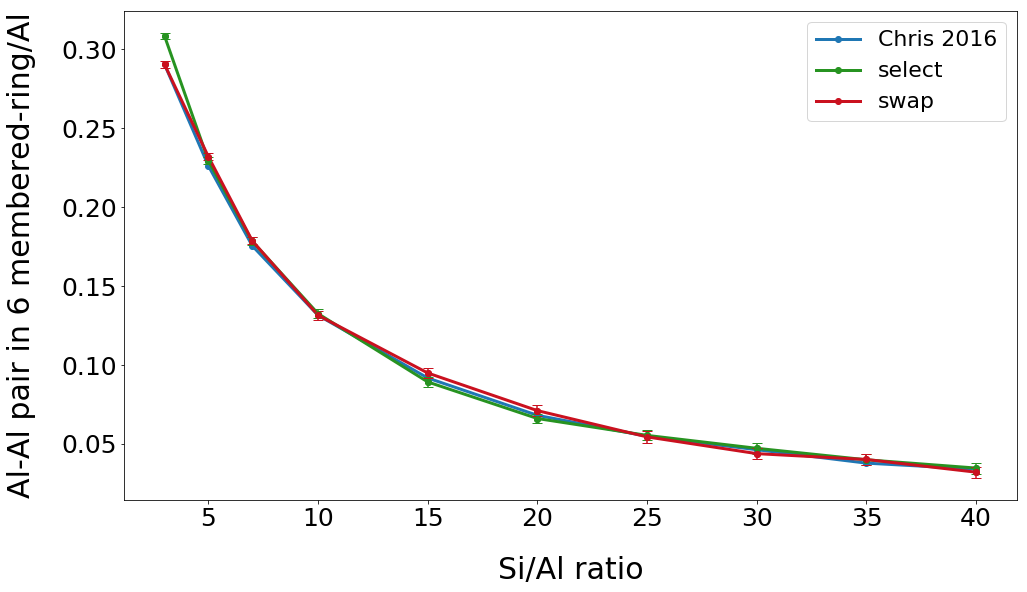

In [127]:
plt.plot(ratios, Chris_data_2016,label='Chris 2016', marker='o',linewidth=3)
#plt.plot(ratios, Chris_data_2014, label='Chris 2014', marker='o',linewidth=3)
plt.plot(ratios, select_mean, label='select', marker='o',color='#279321',linewidth=3)
plt.errorbar(ratios, select_mean, yerr=select_std, fmt='o', capsize=5,color='#279321')
plt.plot(ratios, swap_mean, label='swap', marker='o', color='#CA111F',linewidth=3)
plt.errorbar(ratios, swap_mean, yerr=swap_std, fmt='o', capsize=5, color='#CA111F')
plt.legend()
plt.xlabel('Si/Al ratio')
plt.ylabel('Al-Al pair in 6 membered-ring/Al');

### no1NNno3Al select vs swap

In [128]:
select_no3Al_mean = []
select_no3Al_std = []
for ratio in ratios:
    t = pickle.load(open('CHA_36/3by3by3/no1NN_no3Al_results/select/select_titration_{}.p'.format(ratio), 'rb'))
    t_total = []
    for d in t:
        t_total.append(d['2-11'][0]+d['2-7'][0])
    select_no3Al_mean.append(np.mean(t_total[:200])/int(1/(1+ratio)*972))
    select_no3Al_std.append(np.std(t_total[:200])/int(1/(1+ratio)*972)/1000**(1/3))

In [195]:
t = pickle.load(open('CHA_36/3by3by3/no1NN_no3Al_results/swap/swap_titration_3.p'.format(ratio), 'rb'))

In [204]:
swap_no3Al_2NN = []
swap_no3Al_3NN = []
swap_no3Al_mean =[]
swap_no3Al_std = []
for ratio in ratios:
    t = pickle.load(open('CHA_36/3by3by3/no1NN_no3Al_results/swap/swap_titration_{}.p'.format(ratio), 'rb'))
    t_total = []
    t_2NN = []
    t_3NN = []
    for d in t:
        t_total.append(d['2-11'][0]+d['2-7'][0])
        t_2NN.append(d['2-7'][0])
        t_3NN.append(d['2-11'][0])
    swap_no3Al_2NN.append(np.mean(t_2NN[:200])/int(1/(1+ratio)*972))
    swap_no3Al_3NN.append(np.mean(t_3NN[:200])/int(1/(1+ratio)*972))
    swap_no3Al_mean.append(np.mean(t_total[:200])/int(1/(1+ratio)*972))
    swap_no3Al_std.append(np.std(t_total[:200])/int(1/(1+ratio)*972))

In [184]:
swap_no3Al_mean

[0.37378600823045266,
 0.2495679012345679,
 0.1875619834710744,
 0.13375,
 0.09258333333333332,
 0.07043478260869565,
 0.056486486486486485,
 0.04516129032258064,
 0.03537037037037037,
 0.03391304347826087]

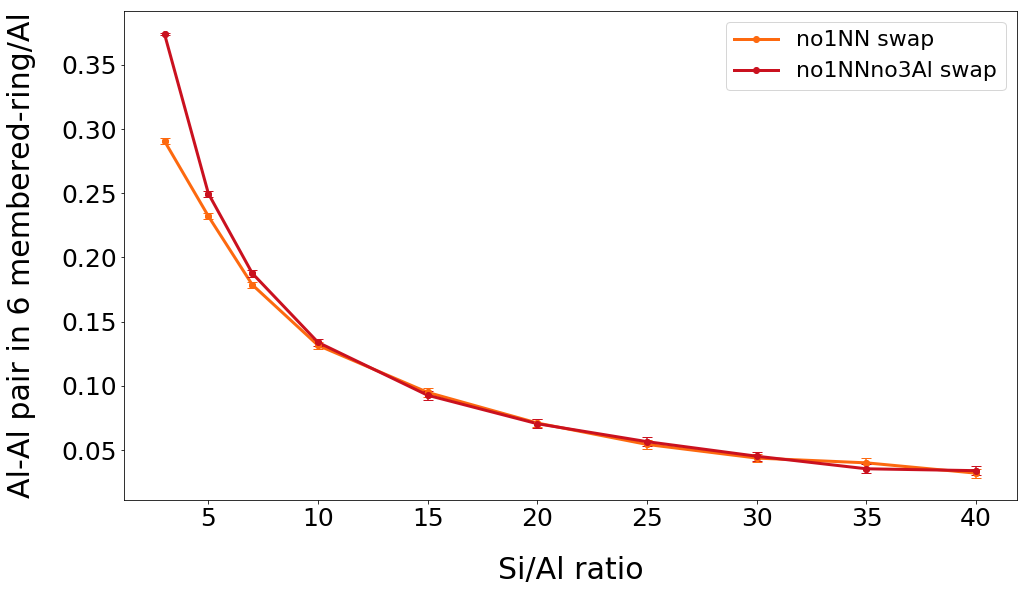

In [130]:
#plt.plot(ratios, select_mean, label='no1NN select', marker='o',color='#1B62A5',linewidth=3)
#plt.errorbar(ratios, select_mean, yerr=select_std, fmt='o', capsize=5,color='#1B62A5')
plt.plot(ratios, swap_mean, label='no1NN swap', marker='o', color='#FD690F',linewidth=3)
plt.errorbar(ratios, swap_mean, yerr=swap_std, fmt='o', capsize=5, color='#FD690F')
#plt.plot(ratios, select_no3Al_mean, label='no1NNno3Al select', marker='o',color='#279321',linewidth=3)
#plt.errorbar(ratios, select_no3Al_mean, yerr=select_no3Al_std, fmt='o', capsize=5,color='#279321')
plt.plot(ratios, swap_no3Al_mean, label='no1NNno3Al swap', marker='o', color='#CA111F',linewidth=3)
plt.errorbar(ratios, swap_no3Al_mean, yerr=swap_no3Al_std, fmt='o', capsize=5, color='#CA111F')
plt.legend()
plt.xlabel('Si/Al ratio')
plt.ylabel('Al-Al pair in 6 membered-ring/Al');

### No bias

In [140]:
select_no1NN = pickle.load(open('CHA_36/1by1by1/no_bias/CHA_36_111_3_select_titration.p','rb'))
swap_no1NN = pickle.load(open('CHA_36/1by1by1/no_bias/CHA_36_111_3_swap_titration.p','rb'))
nobias_no1NN = pickle.load(open('CHA_36/1by1by1/no_bias/CHA_36_111_no1NN_3_nobias_titration.p','rb'))

In [144]:
np.mean(select_no1NN['total']), np.std(select_no1NN['total'])/(1000**0.5)

(2.84, 0.026199236630100507)

In [145]:
np.mean(swap_no1NN['total']), np.std(swap_no1NN['total'])/(1000**0.5)

(2.708, 0.03021152098124158)

In [146]:
np.mean(nobias_no1NN['total']), np.std(nobias_no1NN['total'])/(1000**0.5)

(2.6848930475446124, 0.030037676514621196)

In [152]:
len(nobias_no1NN['total'])

458054

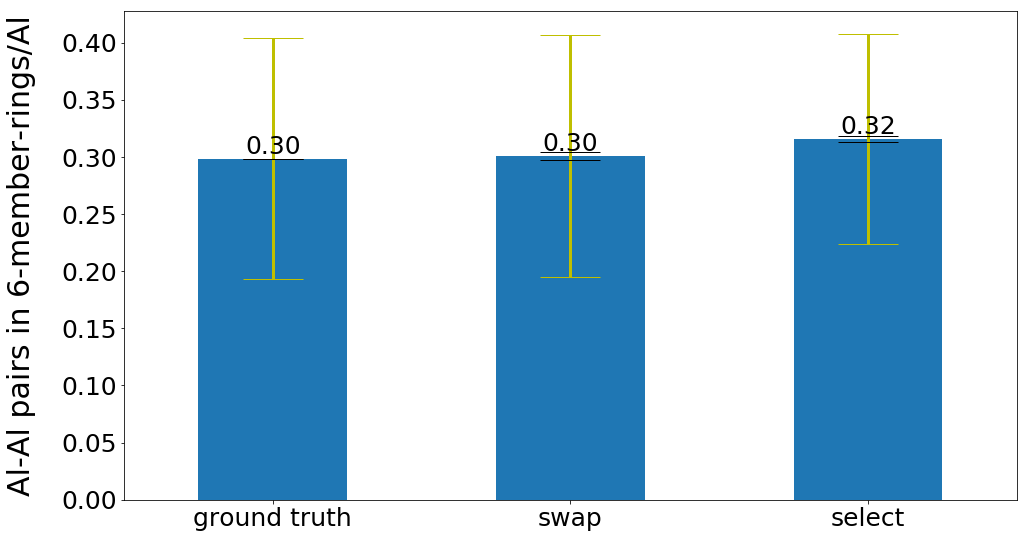

In [198]:
x_labels = ['ground truth', 'swap', 'select']
values = [ np.mean(nobias_no1NN['total'])/9,np.mean(swap_no1NN['total'])/9,np.mean(select_no1NN['total'])/9]
value_series = pd.Series.from_array(values)
x_labels = x_labels
ind = np.arange(3)  # the x locations for the groups
width = 0.35       # the width of the bars
yerr_mean = [np.std(nobias_no1NN['total'])/(len(nobias_no1NN['total'])**0.5)/9,np.std(swap_no1NN['total'])/(1000**0.5)/9,np.std(select_no1NN['total'])/(1000**0.5)/9]
yerr = [np.std(nobias_no1NN['total'])/9,np.std(swap_no1NN['total'])/9,np.std(select_no1NN['total'])/9]
# now to plot the figure...

plt.figure()
ax = value_series.plot(kind='bar', yerr=yerr)

plt.errorbar(ind , value_series, yerr=yerr_mean,capsize=30, elinewidth=3, c='k', ls='none')
plt.errorbar(ind , value_series, yerr=yerr,capsize=30, elinewidth=3, c='y', ls='none')

ax.set_ylabel('Al-Al pairs in 6-member-rings/Al')
ax.set_xticklabels(x_labels)

plt.setp(ax.xaxis.get_majorticklabels(), rotation=0 )

rects = ax.patches

# Now make some labels
labels = ['{:.2f}'.format(x) for x in values]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom')

In [194]:
np.std(nobias_no1NN['total'])/9

0.10554163711727887

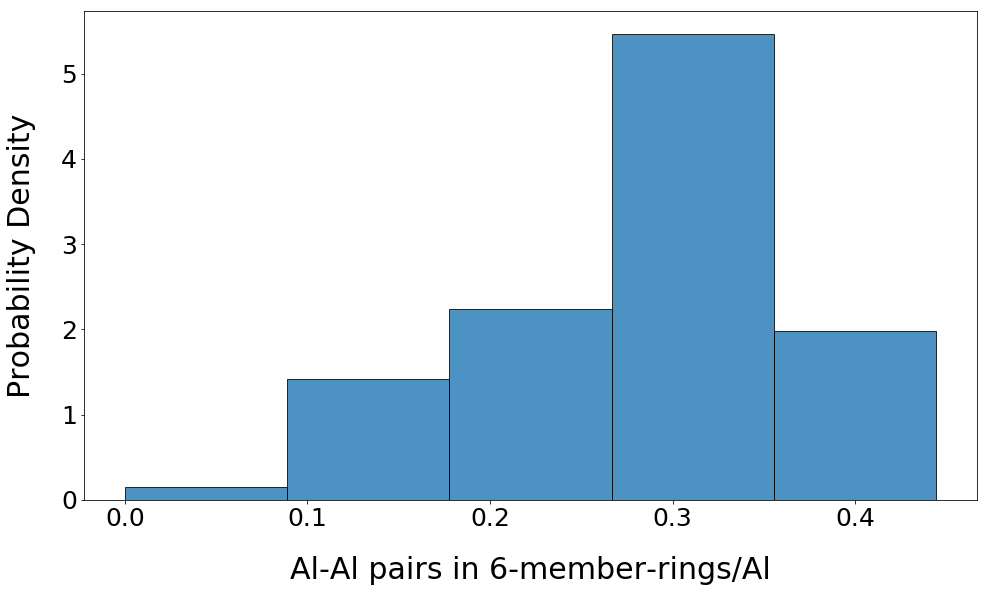

In [204]:
x = [i/9 for i in nobias_no1NN['total']]
plt.hist(x,bins = 5,normed=True, alpha=0.8,histtype='bar', ec='black');

plt.xlabel('Al-Al pairs in 6-member-rings/Al')
plt.ylabel('Probability Density');

# y = [i/9 for i in swap_no1NN['total']]
# plt.hist(y,bins = 5,normed=True, alpha=0.2, color='g');

#z = [i/9 for i in select_no1NN['total']]
#plt.hist(z,bins = 5,normed=True, alpha=0.6, color='r');

### FER

In [139]:
FERdf = pd.DataFrame(columns = ['rules','ratio', 'frac','method', 'exclude', '2-27','2-20','both','both_std'])

In [108]:
def read_results(df, folder_path, rules, ratio,frac=''):
    if frac == '':
        fracvalue = np.nan
    else:
        fracvalue = frac
        frac = '_T4frac'+str(frac)
    temp=pickle.load(open(folder_path+'swap_{}{}_count_T4T4_T1T4_{}_summary.p'.format(rules, frac,ratio),'rb'))
    df=df.append(pd.DataFrame(data=[[rules,ratio, fracvalue,'count',0, np.mean(temp['2-27'])/int(round(1/(1+ratio)*972)), np.mean(temp['2-20'])/int(round(1/(1+ratio)*972)), np.mean(temp['total 2-body'])/int(round(1/(1+ratio)*972)), np.std(temp['total 2-body'])/int(round(1/(1+ratio)*972))]], columns = df.columns))
    temp=pickle.load(open(folder_path+'swap_{}{}_count_T4T4_T1T4_EX3Al_{}_summary.p'.format(rules,frac,ratio),'rb'))
    df=df.append(pd.DataFrame(data=[[rules,ratio, fracvalue,'count',1,np.mean(temp['2-27'])/int(round(1/(1+ratio)*972)), np.mean(temp['2-20'])/int(round(1/(1+ratio)*972)), np.mean(temp['total 2-body'])/int(round(1/(1+ratio)*972)), np.std(temp['total 2-body'])/int(round(1/(1+ratio)*972))]], columns = df.columns))
    temp=pickle.load(open(folder_path+'swap_{}{}_titration_T4T4_T1T4_{}_summary.p'.format(rules,frac,ratio),'rb'))
    df=df.append(pd.DataFrame(data=[[rules,ratio, fracvalue, 'titrate',0,np.mean(temp['2-27'])/int(round(1/(1+ratio)*972)), np.mean(temp['2-20'])/int(round(1/(1+ratio)*972)), np.mean(temp['total'])/int(round(1/(1+ratio)*972)), np.std(temp['total'])/int(round(1/(1+ratio)*972))]], columns = df.columns))
    temp=pickle.load(open(folder_path+'swap_{}{}_titration_T4T4_T1T4_EX3Al_{}_summary.p'.format(rules,frac,ratio),'rb'))
    df=df.append(pd.DataFrame(data=[[rules,ratio, fracvalue, 'titrate',1,np.mean(temp['2-27'])/int(round(1/(1+ratio)*972)), np.mean(temp['2-20'])/int(round(1/(1+ratio)*972)), np.mean(temp['total'])/int(round(1/(1+ratio)*972)), np.std(temp['total'])/int(round(1/(1+ratio)*972))]], columns = df.columns))
    return df

In [140]:
ratios = [3,5,7,9,10,15,20,25,30,35,40]
folder_path = 'FER_36/3by3by3/results/no1NN/'
no1NN_df = pd.DataFrame(columns = ['rules','ratio', 'frac','method', 'exclude', '2-27','2-20','both','both_std'])
for ratio in ratios:
    no1NN_df = read_results(no1NN_df, folder_path, rules='no1NN', ratio=ratio)
no1NN_df.head()

,rules,ratio,frac,method,exclude,2-27,2-20,both,both_std
0,no1NN,3,NaN,count,0,0.010235,0.076473,0.086708,0.016687
0,no1NN,3,NaN,count,1,0.010235,0.044045,0.054280,0.012343
0,no1NN,3,NaN,titrate,0,0.010233,0.060257,0.070490,0.012645
0,no1NN,3,NaN,titrate,1,0.010235,0.044041,0.054276,0.012338
0,no1NN,5,NaN,count,0,0.008741,0.044173,0.052914,0.017476


In [142]:
FERdf = FERdf.append(no1NN_df)

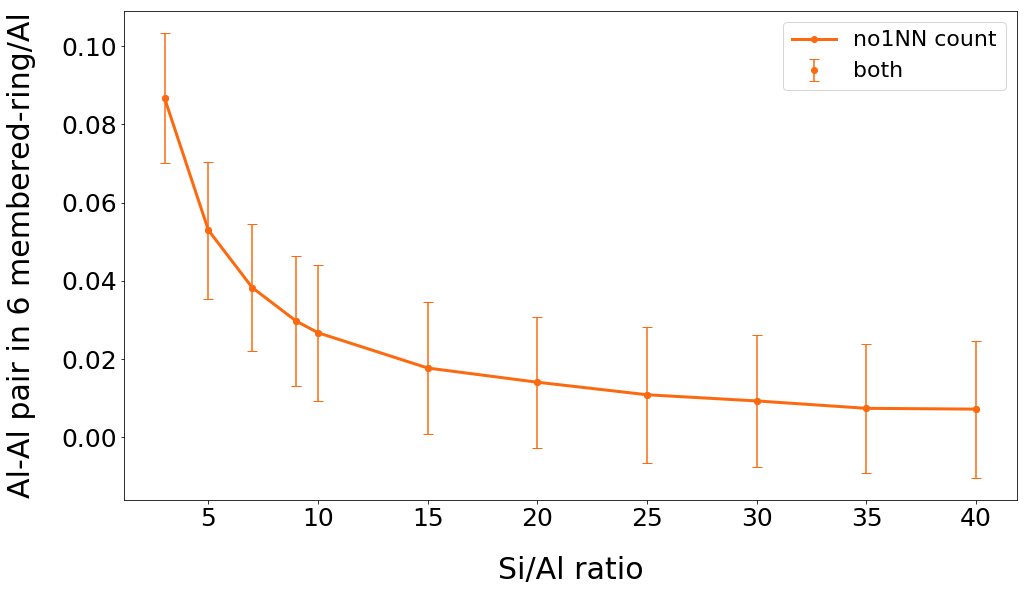

In [138]:
plt.plot(no1NN_df[(no1NN_df.method=='count') & (no1NN_df.exclude==0)].ratio, no1NN_df[(no1NN_df.method=='count') & (no1NN_df.exclude==0)].both, label='no1NN count', marker='o', color='#FD690F',linewidth=3)
plt.errorbar(no1NN_df[(no1NN_df.method=='count') & (no1NN_df.exclude==0)].ratio, no1NN_df[(no1NN_df.method=='count') & (no1NN_df.exclude==0)].both, yerr=no1NN_df[(no1NN_df.method=='count') & (no1NN_df.exclude==0)].both_std, fmt='o', capsize=5, color='#FD690F')
#plt.plot(ratios, select_no3Al_mean, label='no1NNno3Al select', marker='o',color='#279321',linewidth=3)
#plt.errorbar(ratios, select_no3Al_mean, yerr=select_no3Al_std, fmt='o', capsize=5,color='#279321')
#plt.plot(ratios, swap_no3Al_mean, label='no1NNno3Al swap', marker='o', color='#CA111F',linewidth=3)
#plt.errorbar(ratios, swap_no3Al_mean, yerr=swap_no3Al_std, fmt='o', capsize=5, color='#CA111F')
plt.legend()
plt.xlabel('Si/Al ratio')
plt.ylabel('Al-Al pair in 6 membered-ring/Al');

In [143]:
ratios = [9]
fracs = [40,45,50,55,60]
folder_path = 'FER_36/3by3by3/results/no1NN_T4varfrac/'
no1NNvarfrac_9_df = pd.DataFrame(columns = ['rules','ratio', 'frac','method', 'exclude', '2-27','2-20','both','both_std'])
for ratio in ratios:
    for frac in fracs:
        no1NNvarfrac_9_df = read_results(no1NNvarfrac_9_df, folder_path, rules='no1NN',ratio=ratio,frac=frac)
no1NNvarfrac_9_df.head()

,rules,ratio,frac,method,exclude,2-27,2-20,both,both_std
0,no1NN,9,40,count,0,0.070216,0.047361,0.117577,0.023570
0,no1NN,9,40,count,1,0.070216,0.043216,0.113433,0.022546
0,no1NN,9,40,titrate,0,0.070216,0.045289,0.115505,0.022592
0,no1NN,9,40,titrate,1,0.070216,0.043216,0.113433,0.022546
0,no1NN,9,45,count,0,0.091371,0.044897,0.136268,0.023451


In [144]:
FERdf = FERdf.append(no1NNvarfrac_9_df)

<Container object of 3 artists>

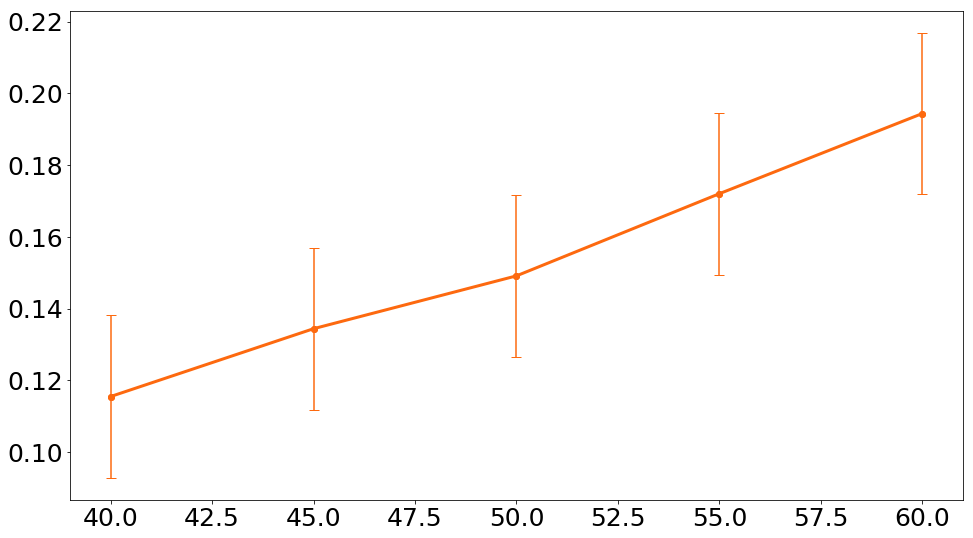

In [123]:
plt.plot(no1NNvarfrac_9_df[(no1NNvarfrac_9_df.method=='titrate') & (no1NNvarfrac_9_df.exclude==0)].frac, no1NNvarfrac_9_df[(no1NNvarfrac_9_df.method=='titrate') & (no1NNvarfrac_9_df.exclude==0)].both, label='no1NN titrate', marker='o', color='#FD690F',linewidth=3)
plt.errorbar(no1NNvarfrac_9_df[(no1NNvarfrac_9_df.method=='titrate') & (no1NNvarfrac_9_df.exclude==0)].frac, no1NNvarfrac_9_df[(no1NNvarfrac_9_df.method=='titrate') & (no1NNvarfrac_9_df.exclude==0)].both, yerr=no1NNvarfrac_9_df[(no1NNvarfrac_9_df.method=='titrate') & (no1NNvarfrac_9_df.exclude==0)].both_std, fmt='o', capsize=5, color='#FD690F')

In [145]:
ratios = [15]
fracs = [75, 80, 85, 90, 95]
folder_path = 'FER_36/3by3by3/results/no1NN_T4varfrac/'
no1NNvarfrac_15_df = pd.DataFrame(columns = ['rules','ratio', 'frac','method', 'exclude', '2-27','2-20','both','both_std'])
for ratio in ratios:
    for frac in fracs:
        no1NNvarfrac_15_df = read_results(no1NNvarfrac_15_df, folder_path, rules='no1NN',ratio=ratio,frac=frac)
no1NNvarfrac_15_df.head()

,rules,ratio,frac,method,exclude,2-27,2-20,both,both_std
0,no1NN,15,75,count,0,0.157410,0.020066,0.177475,0.031129
0,no1NN,15,75,count,1,0.157410,0.019508,0.176918,0.030865
0,no1NN,15,75,titrate,0,0.157410,0.019787,0.177197,0.030925
0,no1NN,15,75,titrate,1,0.157410,0.019508,0.176918,0.030865
0,no1NN,15,80,count,0,0.180787,0.016754,0.197541,0.031197


In [146]:
FERdf = FERdf.append(no1NNvarfrac_15_df)

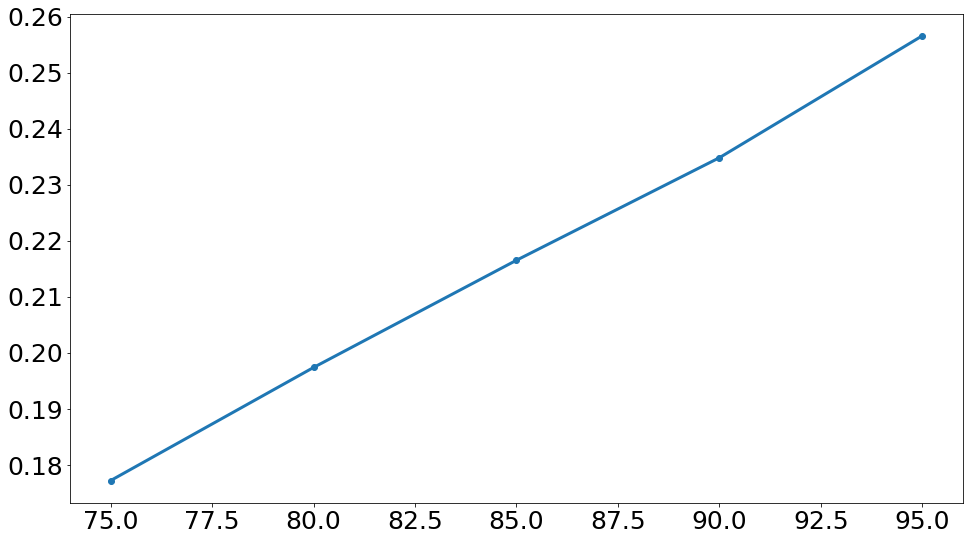

In [132]:
plt.plot(no1NNvarfrac_15_df[(no1NNvarfrac_15_df.method=='titrate') & (no1NNvarfrac_15_df.exclude==0)].frac, no1NNvarfrac_15_df[(no1NNvarfrac_15_df.method=='titrate') & (no1NNvarfrac_15_df.exclude==0)].both, label='no1NN titrate', marker='o',linewidth=3)

In [147]:
ratios = [9]
fracs = [40,45,50,55,60]
folder_path = 'FER_36/3by3by3/results/no1NNnoT4T4_T4varfrac/'
no1NNnoT4T4varfrac_9_df = pd.DataFrame(columns = ['rules','ratio', 'frac','method', 'exclude', '2-27','2-20','both','both_std'])
for ratio in ratios:
    for frac in fracs:
        no1NNnoT4T4varfrac_9_df = read_results(no1NNnoT4T4varfrac_9_df , folder_path, rules='no1NNnoT4T4',ratio=ratio,frac=frac)
no1NNnoT4T4varfrac_9_df.head()

,rules,ratio,frac,method,exclude,2-27,2-20,both,both_std
0,no1NNnoT4T4,9,40,count,0,0.0,0.072134,0.072134,0.024175
0,no1NNnoT4T4,9,40,count,1,0.0,0.065660,0.065660,0.022113
0,no1NNnoT4T4,9,40,titrate,0,0.0,0.068897,0.068897,0.022408
0,no1NNnoT4T4,9,40,titrate,1,0.0,0.065660,0.065660,0.022113
0,no1NNnoT4T4,9,45,count,0,0.0,0.075845,0.075845,0.024703


In [148]:
FERdf = FERdf.append(no1NNnoT4T4varfrac_9_df)

<Container object of 3 artists>

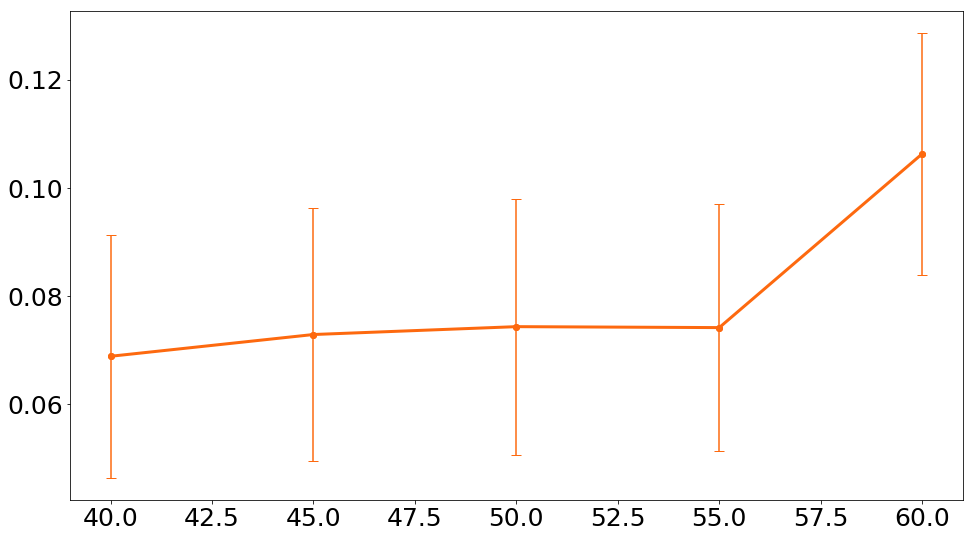

In [121]:
plt.plot(no1NNnoT4T4varfrac_9_df[(no1NNnoT4T4varfrac_9_df.method=='titrate') & (no1NNnoT4T4varfrac_9_df.exclude==0)].frac, no1NNnoT4T4varfrac_9_df[(no1NNnoT4T4varfrac_9_df.method=='titrate') & (no1NNnoT4T4varfrac_9_df.exclude==0)].both, label='no1NN titrate', marker='o', color='#FD690F',linewidth=3)
plt.errorbar(no1NNnoT4T4varfrac_9_df[(no1NNnoT4T4varfrac_9_df.method=='titrate') & (no1NNnoT4T4varfrac_9_df.exclude==0)].frac, no1NNnoT4T4varfrac_9_df[(no1NNnoT4T4varfrac_9_df.method=='titrate') & (no1NNnoT4T4varfrac_9_df.exclude==0)].both, yerr=no1NNnoT4T4varfrac_9_df[(no1NNnoT4T4varfrac_9_df.method=='titrate') & (no1NNnoT4T4varfrac_9_df.exclude==0)].both_std, fmt='o', capsize=5, color='#FD690F')

In [124]:
a = pickle.load(open('FER_36/3by3by3/results/no1NNnoT4T4_T4frac50/swap_no1NNnoT4T4_T4frac50_titration_T4T4_T1T4_9_summary.p','rb'))

In [128]:
np.mean(a['total'])/int(round(1/(1+9)*972))

0.07387628865979382

In [149]:
ratios = [15]
fracs = [75, 80, 85, 90, 95]
folder_path = 'FER_36/3by3by3/results/no1NNnoT4T4_T4varfrac/'
no1NNnoT4T4varfrac_15_df = pd.DataFrame(columns = ['rules','ratio', 'frac','method', 'exclude', '2-27','2-20','both','both_std'])
for ratio in ratios:
    for frac in fracs:
        no1NNnoT4T4varfrac_15_df = read_results(no1NNnoT4T4varfrac_15_df , folder_path, rules='no1NNnoT4T4',ratio=ratio,frac=frac)
no1NNnoT4T4varfrac_15_df.head()

,rules,ratio,frac,method,exclude,2-27,2-20,both,both_std
0,no1NNnoT4T4,15,75,count,0,0.0,0.034082,0.034082,0.021778
0,no1NNnoT4T4,15,75,count,1,0.0,0.033590,0.033590,0.021553
0,no1NNnoT4T4,15,75,titrate,0,0.0,0.033836,0.033836,0.021562
0,no1NNnoT4T4,15,75,titrate,1,0.0,0.033590,0.033590,0.021553
0,no1NNnoT4T4,15,80,count,0,0.0,0.029066,0.029066,0.020101


In [150]:
FERdf = FERdf.append(no1NNnoT4T4varfrac_15_df)

In [136]:
no1NNnoT4T4varfrac_15_df[no1NNnoT4T4varfrac_15_df.frac==85]

,rules,ratio,frac,method,exclude,2-27,2-20,both,both_std
0,no1NNnoT4T4,15,85,count,0,0.0,0.023082,0.023082,0.017683
0,no1NNnoT4T4,15,85,count,1,0.0,0.022951,0.022951,0.017549
0,no1NNnoT4T4,15,85,titrate,0,0.0,0.023016,0.023016,0.017586
0,no1NNnoT4T4,15,85,titrate,1,0.0,0.022951,0.022951,0.017549


In [135]:
no1NNnoT4T4varfrac_15_df[no1NNnoT4T4varfrac_15_df.frac==90]

,rules,ratio,frac,method,exclude,2-27,2-20,both,both_std
0,no1NNnoT4T4,15,90,count,0,0.016393,0.016426,0.032820,0.015308
0,no1NNnoT4T4,15,90,count,1,0.016393,0.016328,0.032721,0.015273
0,no1NNnoT4T4,15,90,titrate,0,0.016393,0.016377,0.032770,0.015264
0,no1NNnoT4T4,15,90,titrate,1,0.016393,0.016328,0.032721,0.015273


In [134]:
no1NNnoT4T4varfrac_15_df[no1NNnoT4T4varfrac_15_df.frac==95]

,rules,ratio,frac,method,exclude,2-27,2-20,both,both_std
0,no1NNnoT4T4,15,95,count,0,0.065574,0.008033,0.073607,0.010648
0,no1NNnoT4T4,15,95,count,1,0.065574,0.008000,0.073574,0.010622
0,no1NNnoT4T4,15,95,titrate,0,0.065574,0.008016,0.073590,0.010623
0,no1NNnoT4T4,15,95,titrate,1,0.065574,0.008000,0.073574,0.010622


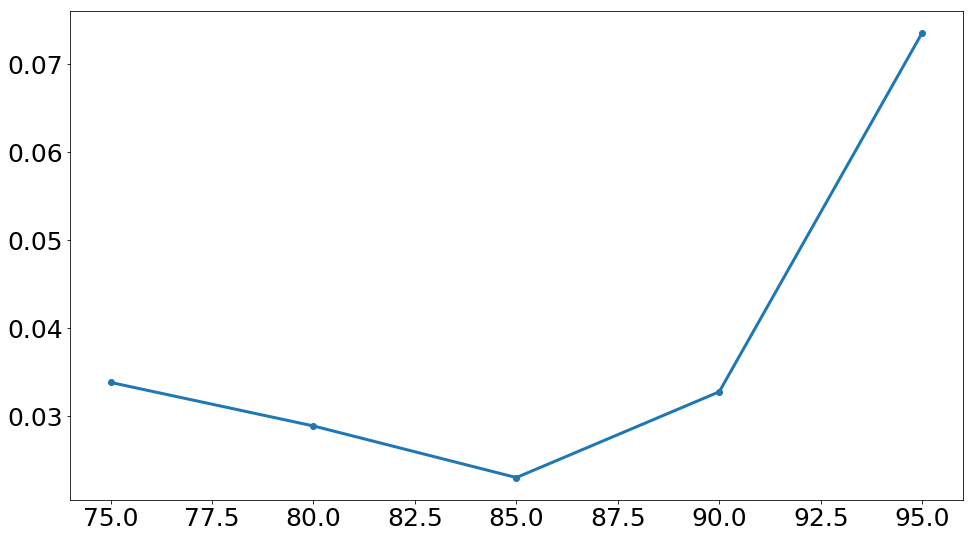

In [133]:
plt.plot(no1NNnoT4T4varfrac_15_df[(no1NNnoT4T4varfrac_15_df.method=='titrate') & (no1NNnoT4T4varfrac_15_df.exclude==0)].frac, no1NNnoT4T4varfrac_15_df[(no1NNnoT4T4varfrac_15_df.method=='titrate') & (no1NNnoT4T4varfrac_15_df.exclude==0)].T, label='no1NNnoT4T4 titrate', marker='o',linewidth=3)

In [152]:
FERdf.reset_index(drop=True, inplace=True)

In [156]:
FERdf = FERdf.rename(columns={'ratio': 'Si_Al_ratio', 'frac': 'T4_frac','exclude': 'EXC_3Al_in_6ring'})

In [160]:
FERdf = FERdf.rename(columns={'2-27': 'T4T4', '2-20': 'T4T2'})

In [161]:
FERdf.head()

,rules,Si_Al_ratio,T4_frac,method,EXC_3Al_in_6ring,T4T4,T4T2,both,both_std
0,no1NN,3,NaN,count,False,0.010235,0.076473,0.086708,0.016687
1,no1NN,3,NaN,count,True,0.010235,0.044045,0.054280,0.012343
2,no1NN,3,NaN,titrate,False,0.010233,0.060257,0.070490,0.012645
3,no1NN,3,NaN,titrate,True,0.010235,0.044041,0.054276,0.012338
4,no1NN,5,NaN,count,False,0.008741,0.044173,0.052914,0.017476


In [178]:
FERdf[(FERdf.Si_Al_ratio==15) & (FERdf.method=='titrate') & (FERdf.EXC_3Al_in_6ring==True) & (FERdf.method=='titrate')]

,rules,Si_Al_ratio,T4_frac,method,EXC_3Al_in_6ring,T4T4,T4T2,both,both_std
23,no1NN,15,NaN,titrate,True,0.003279,0.013508,0.016787,0.016274
67,no1NN,15,75,titrate,True,0.157410,0.019508,0.176918,0.030865
71,no1NN,15,80,titrate,True,0.180787,0.016426,0.197213,0.031031
75,no1NN,15,85,titrate,True,0.204705,0.011754,0.216459,0.031441
79,no1NN,15,90,titrate,True,0.226393,0.008377,0.234770,0.031113
83,no1NN,15,95,titrate,True,0.252295,0.004262,0.256557,0.031395
107,no1NNnoT4T4,15,75,titrate,True,0.000000,0.033590,0.033590,0.021553
111,no1NNnoT4T4,15,80,titrate,True,0.000000,0.028705,0.028705,0.019842
115,no1NNnoT4T4,15,85,titrate,True,0.000000,0.022951,0.022951,0.017549
119,no1NNnoT4T4,15,90,titrate,True,0.016393,0.016328,0.032721,0.015273


In [179]:
#pickle.dump(FERdf, open('FER_36/3by3by3/results/FER_results_summary.p','wb'))

In [404]:
#pickle.dump(CHAdf, open('CHA_36/3by3by3/CHA_results_summary.p','wb'))

In [407]:
CHAdf.to_csv('CHA_36/3by3by3/CHA_results_summary.csv')